# City of Evanston - Emissions Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

Let's read in the data from Evanston's Open Data Portal.

In [2]:
df = pd.read_json('https://data.cityofevanston.org/resource/jf9c-ztgj.json')
df

,_2005,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015,ecap_goal_13_2012,emission_source,livablity_goal_20_2016
0,17588,16430,16172,15464,15585,13766,11973,11063.0,9805,4035,0,15301,Electricity-COE,14070
1,3975,3624,3323,3515,2326,2915,3706,2751.0,3063,3130,2955,3458,Natural gas-COE,3180
2,1321,1378,1445,878,1338,1175,1322,1300.0,1239,1260,1086,1149,Gasoline-COE,1057
3,1398,1393,1538,1395,1563,0,0,NaN,338,304,603,1216,Diesel-COE,1118
4,278,278,305,277,158,1395,1660,1523.0,1325,1402,946,242,Biodiesel-COE,222
5,24559,23102,22783,21529,20969,19251,18661,16636.0,15770,10131,5590,21366,Total-COE,19647
6,154524,146853,148194,144962,135831,149812,147949,75269.0,49547,39990,45832,134436,Electricity - Residential,123619
7,366025,375318,380325,368634,364908,377846,317352,319145.0,306947,293807,258764,318442,Electricity - Commercial,292820
8,18785,17400,18424,19037,14916,19366,21536,19979.0,22085,21416,13396,16343,Electricity - Rail,15028
9,114674,116791,119144,127295,118762,114717,120070,120070.0,122458,114322,118433,99767,Natural Gas - Residential,91739


A few issues:
1. The totals for a given source are contained as entries in the plot. This should probably be changed.
2. The goals are also contained as series - we should create a separate dataframe that only contains the raw data of interest, perhaps indexed to the source and type.

First, we'll split up the descriptor into a type and source and use those to index our data. 


In [3]:
df = df[~df.emission_source.str.contains('Total')].fillna(value=0)
dataonly = df.iloc[:, 0:11].T.fillna(value=0)
dataonly.columns = df['emission_source']
dataonly

emission_source,Electricity-COE,Natural gas-COE,Gasoline-COE,Diesel-COE,Biodiesel-COE,Electricity - Residential,Electricity - Commercial,Electricity - Rail,Natural Gas - Residential,Natural Gas - Commercial,Gasoline-Community,Diesel-Community
_2005,17588.0,3975.0,1321.0,1398.0,278.0,154524.0,366025.0,18785.0,114674.0,224266.0,99664.0,25869.0
_2006,16430.0,3624.0,1378.0,1393.0,278.0,146853.0,375318.0,17400.0,116791.0,221954.0,97149.0,25216.0
_2007,16172.0,3323.0,1445.0,1538.0,305.0,148194.0,380325.0,18424.0,119144.0,234950.0,116452.0,30226.0
_2008,15464.0,3515.0,878.0,1395.0,277.0,144962.0,368634.0,19037.0,127295.0,245586.0,111209.0,28865.0
_2009,15585.0,2326.0,1338.0,1563.0,158.0,135831.0,364908.0,14916.0,118762.0,218672.0,121684.0,31608.0
_2010,13766.0,2915.0,1175.0,0.0,1395.0,149812.0,377846.0,19366.0,114717.0,198521.0,133092.0,37903.0
_2011,11973.0,3706.0,1322.0,0.0,1660.0,147949.0,317352.0,21536.0,120070.0,207016.0,119657.0,34077.0
_2012,11063.0,2751.0,1300.0,0.0,1523.0,75269.0,319145.0,19979.0,120070.0,211300.0,109779.0,27445.0
_2013,9805.0,3063.0,1239.0,338.0,1325.0,49547.0,306947.0,22085.0,122458.0,221533.0,113014.0,28253.0
_2014,4035.0,3130.0,1260.0,304.0,1402.0,39990.0,293807.0,21416.0,114322.0,185995.0,144267.0,36066.0


Now, let's reindex by the real date and let's sort the columns by their final value so that we get an area plot that looks appropriately stacked!

In [4]:
dataonly.index = pd.date_range(start='2005', periods=11, freq='A')
dataonly = dataonly.reindex_axis(dataonly.tail(1).mean().sort_values(ascending=False).index, axis=1)
dataonly

emission_source,Electricity - Commercial,Natural Gas - Commercial,Gasoline-Community,Natural Gas - Residential,Electricity - Residential,Diesel-Community,Electricity - Rail,Natural gas-COE,Gasoline-COE,Biodiesel-COE,Diesel-COE,Electricity-COE
2005-12-31,366025.0,224266.0,99664.0,114674.0,154524.0,25869.0,18785.0,3975.0,1321.0,278.0,1398.0,17588.0
2006-12-31,375318.0,221954.0,97149.0,116791.0,146853.0,25216.0,17400.0,3624.0,1378.0,278.0,1393.0,16430.0
2007-12-31,380325.0,234950.0,116452.0,119144.0,148194.0,30226.0,18424.0,3323.0,1445.0,305.0,1538.0,16172.0
2008-12-31,368634.0,245586.0,111209.0,127295.0,144962.0,28865.0,19037.0,3515.0,878.0,277.0,1395.0,15464.0
2009-12-31,364908.0,218672.0,121684.0,118762.0,135831.0,31608.0,14916.0,2326.0,1338.0,158.0,1563.0,15585.0
2010-12-31,377846.0,198521.0,133092.0,114717.0,149812.0,37903.0,19366.0,2915.0,1175.0,1395.0,0.0,13766.0
2011-12-31,317352.0,207016.0,119657.0,120070.0,147949.0,34077.0,21536.0,3706.0,1322.0,1660.0,0.0,11973.0
2012-12-31,319145.0,211300.0,109779.0,120070.0,75269.0,27445.0,19979.0,2751.0,1300.0,1523.0,0.0,11063.0
2013-12-31,306947.0,221533.0,113014.0,122458.0,49547.0,28253.0,22085.0,3063.0,1239.0,1325.0,338.0,9805.0
2014-12-31,293807.0,185995.0,144267.0,114322.0,39990.0,36066.0,21416.0,3130.0,1260.0,1402.0,304.0,4035.0


Now let's make our area plot.

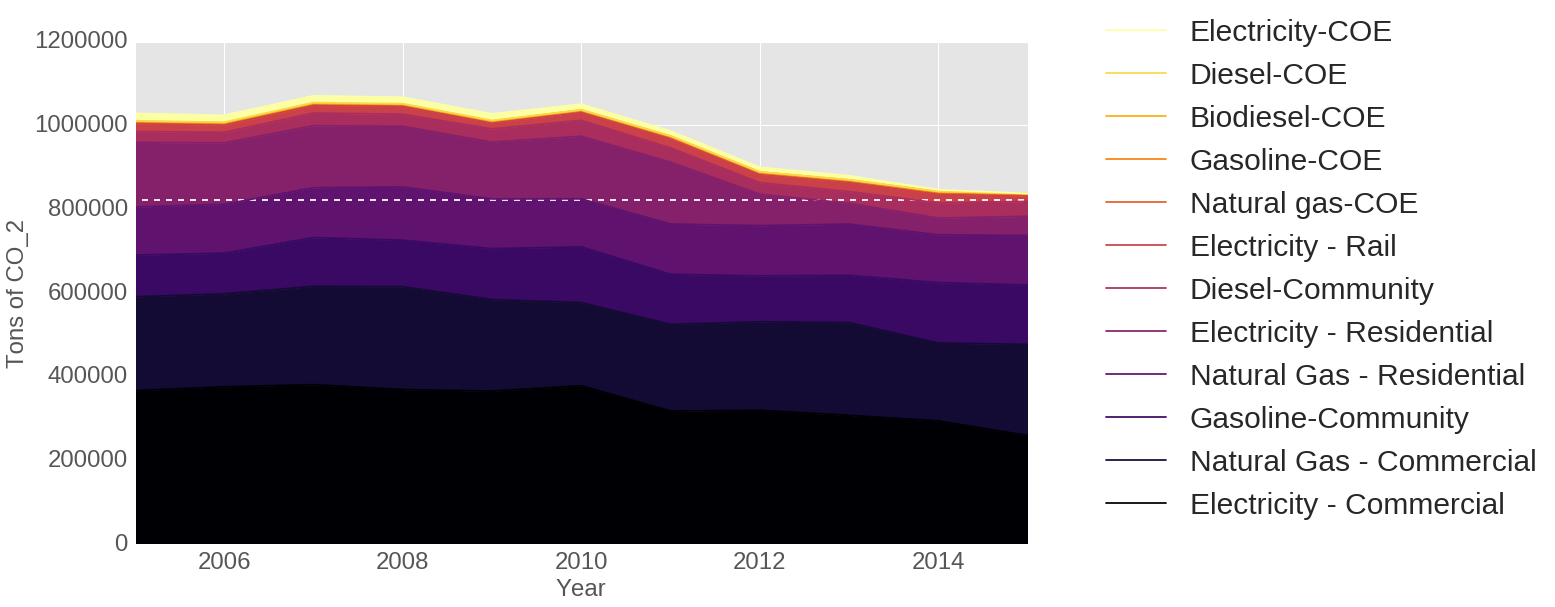

In [5]:
ax = dataonly.plot.area(figsize=(16,9), fontsize=24, cmap='inferno')
#plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.6, 1.1), fontsize=30)
ax.hlines(822693, xmin=0, xmax=1000, colors='w', linestyles='--')
plt.ylabel('Tons of CO_2', fontsize=24)
plt.xlabel('Year', fontsize=24)

The nice thing about this area plot is that it is actually an appropriate use of an area plot! The cumulative area is all of the CO$_2$ emissions released in the time period. Now let's look at how close we are in each category to the target

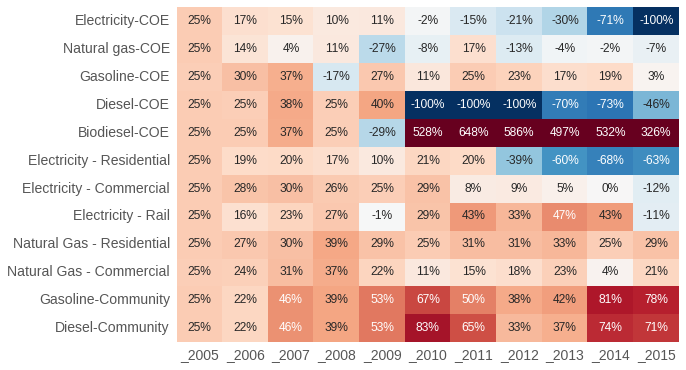

In [27]:
sns.set_context('notebook',  font_scale=1.4)
normalized_to_target = df.iloc[:, 0:11].subtract(df.livablity_goal_20_2016, axis='index').divide(df.livablity_goal_20_2016, axis='index')
normalized_to_target.columns = df.iloc[:,0:11].columns


plt.figure(figsize=(9,6))
sns.heatmap(normalized_to_target, cmap='RdBu_r', vmin=-1, vmax=1, cbar=False,
                yticklabels=df.emission_source.tolist(), annot=True, fmt='0.0%', annot_kws={'fontsize':12})

The previous plot, however, does not accurately indicate how large an effect each category actually has on the total amount of emissions. The following plot represents this more accurately, showing by the intensity of the color how far above/below the emissions target in each category the value lies in absolute difference.

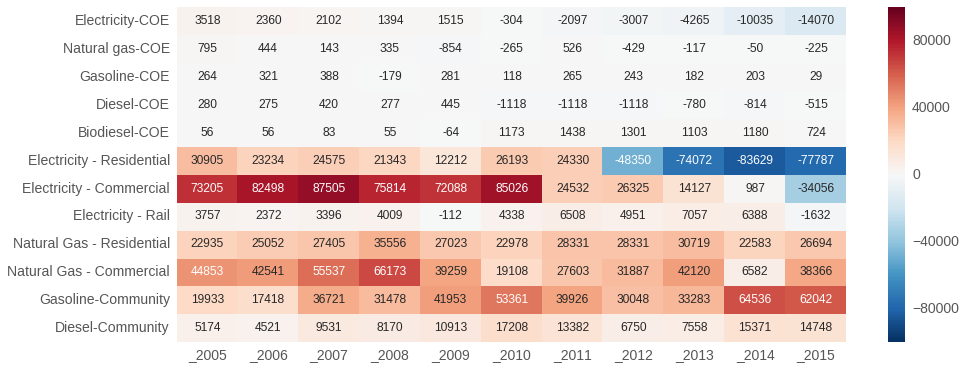

In [28]:
normalized_to_target = df.iloc[:, 0:11].subtract(df.livablity_goal_20_2016, axis='index')
normalized_to_target.columns = df.iloc[:,0:11].columns
plt.figure(figsize=(15,6))
sns.heatmap(normalized_to_target, cmap='RdBu_r', vmin=-100000, vmax=100000,
                yticklabels=df.emission_source.tolist(), annot=True, fmt='0.0f', annot_kws={'fontsize':12})

In [8]:
tmp = df.emission_source.str.split('-', expand=True)
tmp.columns = ['energy_source', 'entity']
tmp.energy_source = tmp.energy_source.str.strip()
tmp.energy_source = tmp.energy_source.str.replace(' Gas', ' gas')
tmp.entity = tmp.entity.str.strip()

df['energy_source'] = tmp['energy_source']
df['entity'] = tmp['entity']

ptable = df.drop(labels=['emission_source', ], axis=1)

,_2005,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,3518.0,2360.0,2102.0,1394.0,1515.0,-304.0,-2097.0,-3007.0,-4265.0,-10035.0,-14070.0
1,795.0,444.0,143.0,335.0,-854.0,-265.0,526.0,-429.0,-117.0,-50.0,-225.0
2,264.0,321.0,388.0,-179.0,281.0,118.0,265.0,243.0,182.0,203.0,29.0
3,280.0,275.0,420.0,277.0,445.0,-1118.0,-1118.0,-1118.0,-780.0,-814.0,-515.0
4,56.0,56.0,83.0,55.0,-64.0,1173.0,1438.0,1301.0,1103.0,1180.0,724.0
6,30905.0,23234.0,24575.0,21343.0,12212.0,26193.0,24330.0,-48350.0,-74072.0,-83629.0,-77787.0
7,73205.0,82498.0,87505.0,75814.0,72088.0,85026.0,24532.0,26325.0,14127.0,987.0,-34056.0
8,3757.0,2372.0,3396.0,4009.0,-112.0,4338.0,6508.0,4951.0,7057.0,6388.0,-1632.0
9,22935.0,25052.0,27405.0,35556.0,27023.0,22978.0,28331.0,28331.0,30719.0,22583.0,26694.0
10,44853.0,42541.0,55537.0,66173.0,39259.0,19108.0,27603.0,31887.0,42120.0,6582.0,38366.0
